# AI QUALITY TEST

## Import libraries and data

In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files
client_df = pd.read_csv("AI Testing Files/Input_Files/client_evaluation_10.csv")
ai_df = pd.read_csv("AI Testing Files/Output_Files/ai_evaluation_10.csv")

In [3]:
client_df.head()

,Unit ID,LO #,Learning Outcome,Flag,Our AI,Summary,Suggestion,Note,Curriculum Team Comment.,clientstatus_raw,clientstatus,rewritten_quality
0,ACCT2242,1,identify and explain roles and components of AIS,Good,Good,This learning outcome appropriately combines i...,NaN,NaN,"AIS is an abbreviation of the unit title, perh...",NaN,COULD_IMPROVE,NaN
1,ACCT2242,2,describe the role of internal control systems ...,Strong,Could Improve,"While ‘describe’ is appropriate for Level 2, ‘...",‘describe the role of an internal control syst...,Application is perfectly suitable for a level ...,no comment,NaN,COULD_IMPROVE,GOOD
2,ACCT2242,3,critically evaluate business processes and doc...,Strong,Needs Revision,‘Critically evaluate’ is a Level 6 (Evaluation...,‘compare and contrast business processes and s...,"Taxonomical change only, think its fine",There are many Level 3 …and I'd say some Level...,NaN,GOOD,NaN
3,ACCT2242,4,demonstrate data analytics/visualisation techn...,Strong,Needs Revision,‘Demonstrate’ is an Application level verb (Le...,‘explain basic data analytics and visualisatio...,Unnecessary change since for practical assessm...,I am actually not perturbed by Demonstrate at L2,NaN,GOOD,NaN
4,ACCT2242,5,explain the impact of ICT on accounting practices,Good,Good,This learning outcome uses ‘explain’ which is ...,NaN,NaN,The model should perhhaps mhighlight acronyms ...,NEEDS_REVISION,NEEDS_REVISION,NaN


In [4]:
ai_df.head()

,unitcode,title,level,outcome_number,original_outcome,rewritten_outcome,evaluation,status,feedback,assessment,processing_time
0,DENT3005,General Medicine and Pharmacology,3,1,"explain the clinical signs, symptoms and patho...","Apply knowledge of clinical signs, symptoms an...",GOOD,COULD_IMPROVE,This outcome leans towards comprehension rathe...,written assessments,1.895556
1,DENT3005,General Medicine and Pharmacology,3,2,discuss the pathogenicity and virulence of mic...,Apply principles of microbial pathogenicity an...,GOOD,NEEDS_REVISION,This outcome is firmly in the comprehension do...,written assessments,1.895556
2,DENT3005,General Medicine and Pharmacology,3,3,apply the principles of infection prevention a...,NaN,ALREADY_GOOD,GOOD,"This outcome clearly demonstrates application,...",practical assessments,1.895556
3,DENT3005,General Medicine and Pharmacology,3,4,explain the measures required to manage system...,Apply protocols for managing patients with sys...,GOOD,COULD_IMPROVE,"This outcome is primarily explanatory, focusin...",written assessments,1.895556
4,DENT3005,General Medicine and Pharmacology,3,5,classify the most common medical emergencies i...,Demonstrate the appropriate response to common...,GOOD,NEEDS_REVISION,"Classification falls into the analysis domain,...",written assessments,1.895556


## Test 1- AI Classification Test

To assess how closely our AI’s evaluation of the original learning outcomes aligns with the client’s judgment, we compared two key columns from the dataset: “clientstatus” and “Our AI.” The clientstatus column represents the client’s assessment of whether each learning outcome is satisfactory (GOOD), requires minor improvement (COULD_IMPROVE), or needs substantial revision (NEEDS_REVISION). The Our AI column represents the AI’s automated judgment using the same three categories. Treating the client’s assessment as the ground truth, we computed a confusion matrix to visualize how often the AI’s predictions matched or differed from the client’s evaluations across all categories. Additionally, we calculated F1-scores to measure the overall accuracy and balance between precision and recall for each label. Before conducting this analysis, all entries containing missing (NaN) or invalid values were removed to ensure valid comparisons. This test provides an objective measure of how reliably the AI can replicate the client’s decision-making in assessing the quality of the original learning outcomes.

In [5]:
# Column names
client_col = "clientstatus"
ai_col = "Our AI"

# Standardize text (upper, strip spaces, replace spaces with underscores)
client_df[client_col] = client_df[client_col].astype(str).str.upper().str.strip().str.replace(" ", "_")
client_df[ai_col] = client_df[ai_col].astype(str).str.upper().str.strip().str.replace(" ", "_")

# Replace 'NAN' with actual NaN
client_df = client_df.replace("NAN", pd.NA)

# Count blanks (NaN)
client_blank = client_df[client_col].isna().sum()
ai_blank = client_df[ai_col].isna().sum()

print(f"Blank (NaN) entries in clientstatus: {client_blank}")
print(f"Blank (NaN) entries in Our AI: {ai_blank}")

# Drop NaN rows
df_clean = client_df.dropna(subset=[client_col, ai_col])

# Define valid labels (standardized)
labels = ["GOOD", "COULD_IMPROVE", "NEEDS_REVISION"]

# Filter valid rows
df_valid = df_clean[df_clean[client_col].isin(labels) & df_clean[ai_col].isin(labels)]

# Extract data
y_true = df_valid[client_col]
y_pred = df_valid[ai_col]

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=[f"Client_{l}" for l in labels], columns=[f"AI_{l}" for l in labels])

print("\nConfusion Matrix:")
print(cm_df)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=labels, digits=3, zero_division=0))

# Weighted average F1-score
f1 = f1_score(y_true, y_pred, labels=labels, average='weighted', zero_division=0)
print(f"\nWeighted F1 Score: {f1:.3f}")

Blank (NaN) entries in clientstatus: 0
Blank (NaN) entries in Our AI: 0

Confusion Matrix:
                       AI_GOOD  AI_COULD_IMPROVE  AI_NEEDS_REVISION
Client_GOOD                  7                 6                 16
Client_COULD_IMPROVE         3                 8                  1
Client_NEEDS_REVISION        2                 0                 21

Classification Report:
                precision    recall  f1-score   support

          GOOD      0.583     0.241     0.341        29
 COULD_IMPROVE      0.571     0.667     0.615        12
NEEDS_REVISION      0.553     0.913     0.689        23

      accuracy                          0.562        64
     macro avg      0.569     0.607     0.548        64
  weighted avg      0.570     0.562     0.518        64


Weighted F1 Score: 0.518


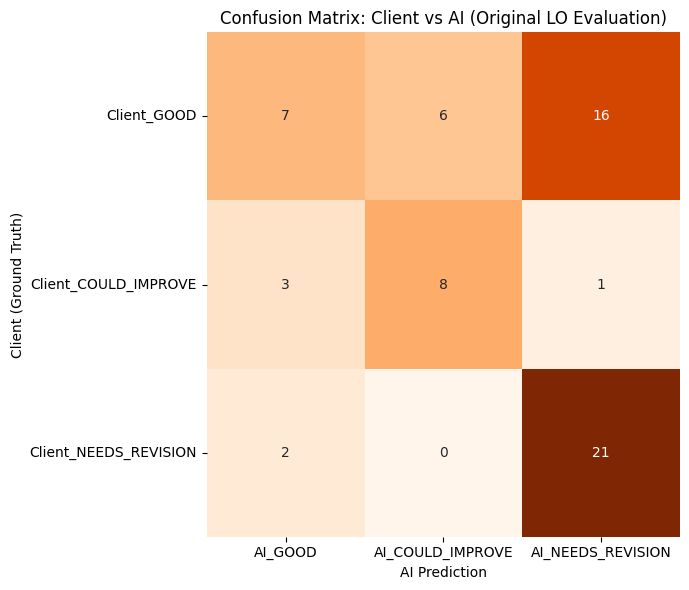

In [6]:
# Confusion Matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix: Client vs AI (Original LO Evaluation)")
plt.ylabel("Client (Ground Truth)")
plt.xlabel("AI Prediction")
plt.tight_layout()
plt.show()

## Test 2- Rewritten Quality Test

To evaluate the accuracy of our AI system’s rewritten quality assessment, we compared its predictions against the client’s evaluations. Specifically, we used the “evaluation” column from ai_result_10.csv, which represents the AI’s assessment of whether the rewritten output was “GOOD” or “BAD”, and the “rewritten quality” column from client_result_10.csv, which reflects the client’s judgment of the same outputs. The client’s evaluation was treated as the ground truth. We then performed a comparison to measure agreement between the two sets of labels using a confusion matrix and F1 score. Before analysis, all rows containing missing (NaN) values were excluded to ensure a fair comparison. The confusion matrix visually summarises where the AI’s assessments matched or differed from the client’s ratings, while the F1 score quantifies overall accuracy by balancing precision and recall for the “GOOD” category. This approach provides an objective measure of how well the AI’s quality assessment aligns with the client’s evaluation.

In [7]:
# Define column names
client_col = "rewritten_quality"
ai_col = "evaluation"

# Ensure both have the same length (align by row index)
min_len = min(len(client_df), len(ai_df))
client_series = client_df[client_col].head(min_len)
ai_series = ai_df[ai_col].head(min_len)

# Convert to uppercase and strip whitespace
client_series = client_series.astype(str).str.upper().str.strip()
ai_series = ai_series.astype(str).str.upper().str.strip()

# Replace 'NAN' strings back to actual NaN for consistency
client_series = client_series.replace("NAN", pd.NA)
ai_series = ai_series.replace("NAN", pd.NA)

# Count blanks (NaN)
client_blank_count = client_series.isna().sum()
ai_blank_count = ai_series.isna().sum()

print(f"Blank (NaN) entries in client (rewritten quality): {client_blank_count}")
print(f"Blank (NaN) entries in AI (evaluation): {ai_blank_count}")

# Drop NaN values before comparison
mask = (~client_series.isna()) & (~ai_series.isna())
client_clean = client_series[mask]
ai_clean = ai_series[mask]

# Keep only GOOD/BAD values
valid_mask = client_clean.isin(["GOOD", "BAD"]) & ai_clean.isin(["GOOD", "BAD"])
client_valid = client_clean[valid_mask]
ai_valid = ai_clean[valid_mask]

# Confusion Matrix
cm = confusion_matrix(client_valid, ai_valid, labels=["GOOD", "BAD"])
cm_df = pd.DataFrame(cm, index=["Client_GOOD", "Client_BAD"], columns=["AI_GOOD", "AI_BAD"])

print("\nConfusion Matrix:")
print(cm_df)

# Classification report
print("\nClassification Report:")
print(classification_report(client_valid, ai_valid, labels=["GOOD", "BAD"], digits=3))

# Optional: F1 score for 'GOOD'
f1 = f1_score(client_valid, ai_valid, pos_label="GOOD")
print(f"\nF1 Score (for 'GOOD' as positive): {f1:.3f}")


Blank (NaN) entries in client (rewritten quality): 40
Blank (NaN) entries in AI (evaluation): 0

Confusion Matrix:
             AI_GOOD  AI_BAD
Client_GOOD       13       4
Client_BAD         6       0

Classification Report:
              precision    recall  f1-score   support

        GOOD      0.684     0.765     0.722        17
         BAD      0.000     0.000     0.000         6

    accuracy                          0.565        23
   macro avg      0.342     0.382     0.361        23
weighted avg      0.506     0.565     0.534        23


F1 Score (for 'GOOD' as positive): 0.722


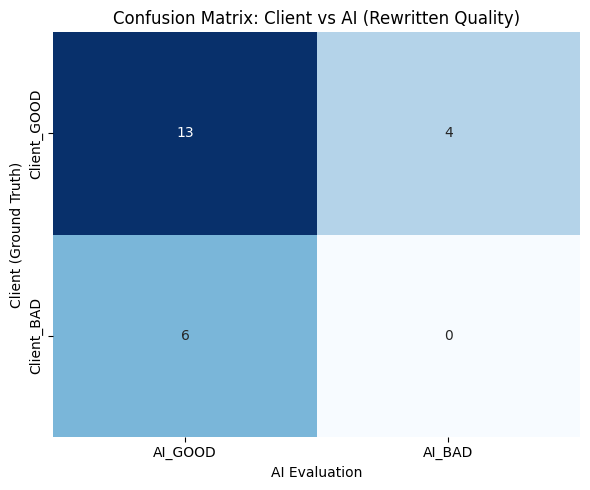

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix: Client vs AI (Rewritten Quality)")
plt.ylabel("Client (Ground Truth)")
plt.xlabel("AI Evaluation")
plt.tight_layout()
plt.show()

## Test 3- AI Automated Self-evaluation

The AI Automated Test was designed to evaluate the system’s ability to independently re-assess its own rewritten learning outcomes without human intervention. This test utilised the online API model with a specialised evaluation prompt to automatically determine whether each rewritten outcome was good or bad. To ensure efficiency and maintain a representative sample, only 20% of the client-provided dataset was used, comprising 1,225 units out of a total of 6,311 learning outcomes. The AI autonomously processed all selected entries and achieved a success rate of 93.3%, demonstrating strong reliability in reproducing accurate rewrite quality judgments. All testing scripts and configurations for this evaluation are available in the ai-testing branch of the project’s GitHub repository, enabling full reproducibility and transparency of the automated testing process.

In [9]:
auto = pd.read_csv("AI Testing Files/Output_Files/ai_results_20.csv")
auto

,unitcode,title,level,outcome_number,original_outcome,rewritten_outcome,evaluation,status,feedback,assessment,processing_time
0,ACCT5589,Dissertation (Accounting) Part 4,5,1,design and execute a structured research project,NaN,ALREADY_GOOD,GOOD,This outcome clearly falls within the Synthesi...,dissertation,2.655074
1,ACCT5589,Dissertation (Accounting) Part 4,5,2,develop appropriate research questions or hypo...,NaN,ALREADY_GOOD,GOOD,This outcome requires students to construct or...,dissertation,2.655074
2,ACCT5589,Dissertation (Accounting) Part 4,5,3,apply appropriate research methods,critically evaluate and adapt research methods...,GOOD,NEEDS_REVISION,"This outcome is at the Application level, not ...",dissertation,2.655074
3,ACCT5589,Dissertation (Accounting) Part 4,5,4,produce a written research report with appropr...,synthesise research findings into a coherent a...,GOOD,COULD_IMPROVE,"While acceptable, this outcome could be streng...",dissertation,2.655074
4,DENT6879,Oral Pathology Clinical Practice II Part 2,6,1,"evaluate, synthesize and apply the literature ...",NaN,ALREADY_GOOD,GOOD,This outcome appropriately combines Evaluation...,"Case-based Discussion (CbD), Clinical Evaluati...",2.335927
...,...,...,...,...,...,...,...,...,...,...,...
6306,PUBH4404,Population Health Honours Project Part 1,4,5,implement a research strategy,Evaluate the feasibility and potential challen...,GOOD,NEEDS_REVISION,"'Implement' is an application-level verb, not ...",• Manuscript,1.723740
6307,PUBH4404,Population Health Honours Project Part 1,4,6,demonstrate scholarly communication of researc...,Critically assess the effectiveness of differe...,GOOD,NEEDS_REVISION,'Demonstrate' is an application-level verb.,• Manuscript \r\n• Research se...,1.723740
6308,PUBH4404,Population Health Honours Project Part 1,4,7,discuss the ethical implications associated wi...,Analyse the ethical complexities associated wi...,GOOD,COULD_IMPROVE,'Discuss' is generally comprehension-level.,• Manuscript \r\n• Research se...,1.723740
6309,PUBH4404,Population Health Honours Project Part 1,4,8,effectively manage a research project,Evaluate the effectiveness of different projec...,GOOD,NEEDS_REVISION,'Manage' is an application-level verb.,• Manuscript \r\n• Supervisor ...,1.723740


Units processed: 1225
Total outcomes evaluated: 6311
API calls made: ~2450

Results breakdown:
  Already good outcomes: 1541
  Good rewrites: 4448
  Bad rewrites: 321
  Unknown/Errors: 1

✅ Rewrite Success Rate: 93.3%